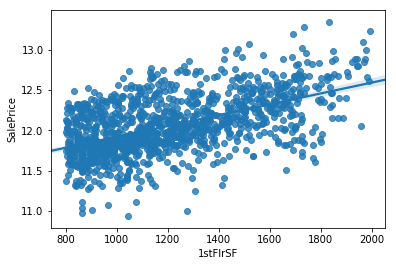

/Users/yu-hsuantseng/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8871087910523817

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns
import matplotlib.pyplot as plt



f_app = os.path.expanduser('~/Desktop/house_train.csv')
df_train = pd.read_csv(f_app)
train_y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id','SalePrice'],axis = 1)

num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_y.shape[0]

#df['1stFlrSF'] = df['1stFlrSF'].clip(600,2000)
keep_indexs = (df['1stFlrSF']>800) &(df['1stFlrSF']<2000)
df =df[keep_indexs]
train_y = train_y[keep_indexs]
sns.regplot(x = df['1stFlrSF'],y=train_y)
plt.show()

train_x=MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator,train_x,train_y,cv=5).mean()